In [10]:
import librosa
import random
import numpy as np
import pandas as pd
import json
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import wave
import os 
from scipy.signal import find_peaks


In [11]:
import wave
import librosa
import numpy as np
import os 
from scipy.signal import find_peaks

unique_sample_rates = np.array([])
min_song_len = float('inf')

directory = 'audio_database'


def mel_binary_mean(mel_spectrum):
    # Computes the row-wise mean values (the mean of each channel)
    channel_means = np.mean(mel_spectrum, axis=1)

    # Applies thresholding to create binary representation
    binary_spectrum = np.where(mel_spectrum >= channel_means[:, np.newaxis], 1, 0)

    return binary_spectrum


def find_peaks_per_channel(spectrum, threshold=0):
    peaks = np.zeros_like(spectrum)
    
    for i in range(spectrum.shape[0]):
        channel_data = spectrum[i, :]
        channel_peaks, _ = find_peaks(channel_data, height=threshold)
        peaks[i, channel_peaks] = 1
    
    return peaks

# Create a new folder to save the npy files
new_folder = "npy_files"
new_folder_path = os.path.join(directory, new_folder)
os.makedirs(new_folder_path, exist_ok=True)

for folder_name in os.listdir(directory):
    unique_song_len = np.array([])

    folder_path = os.path.join(directory, folder_name)
    if os.path.isdir(folder_path):  # Check if the item is a directory
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):
                try: 
                    file_path = os.path.join(folder_path, filename)
                    audio_signal, sample_rate = librosa.load(file_path, sr=None)

                    unique_sample_rates = np.append(unique_sample_rates, sample_rate)
                    
                    n_fft = 2048
                    hop_length = n_fft // 16
                    magnitude_spectrum = np.abs(librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length))
                    num_mels = 8
                    mel_spectrum = librosa.feature.melspectrogram(
                        sr=sample_rate,
                        S=magnitude_spectrum,
                        n_fft=n_fft,
                        hop_length=hop_length,
                        n_mels=num_mels
                    )
                    #mel_spectrum = mel_spectrum[:, :min_song_len]
                    unique_song_len = np.append(unique_song_len, np.shape(mel_spectrum[0]))
                    peak_spectrogram = mel_binary_mean(mel_spectrum) #<---------- to change encoder 
                    #peak_spectrogram = peak_spectrogram[:, :min_song_len]

                    output_filename = f"{filename}_peak_spectrogram.npy"  # Move this line here
                    output_path = os.path.join(new_folder_path, output_filename)
                    np.save(output_path, peak_spectrogram)
                    print(f"Processed {filename} in folder {folder_name}. Saved peak_spectrogram as {output_filename}")
                    
                    
                    if min_song_len > len(peak_spectrogram[1]):
                        min_song_len = len(peak_spectrogram[1])

                except Exception as e:
                    print(f"Error processing {filename} in folder {folder_name}: {str(e)}")
                    continue
        print(f"unique song length in {folder_name} is {np.unique(unique_song_len)}")

min_song_len = int(min_song_len)        
print(f"unique sample rates for all genres {np.unique(unique_sample_rates)}")
print(f"minimum song length is {min_song_len}")

Processed pop.00027.wav in folder pop. Saved peak_spectrogram as pop.00027.wav_peak_spectrogram.npy
Processed pop.00033.wav in folder pop. Saved peak_spectrogram as pop.00033.wav_peak_spectrogram.npy
Processed pop.00032.wav in folder pop. Saved peak_spectrogram as pop.00032.wav_peak_spectrogram.npy
Processed pop.00026.wav in folder pop. Saved peak_spectrogram as pop.00026.wav_peak_spectrogram.npy
Processed pop.00030.wav in folder pop. Saved peak_spectrogram as pop.00030.wav_peak_spectrogram.npy
Processed pop.00024.wav in folder pop. Saved peak_spectrogram as pop.00024.wav_peak_spectrogram.npy
Processed pop.00018.wav in folder pop. Saved peak_spectrogram as pop.00018.wav_peak_spectrogram.npy
Processed pop.00019.wav in folder pop. Saved peak_spectrogram as pop.00019.wav_peak_spectrogram.npy
Processed pop.00025.wav in folder pop. Saved peak_spectrogram as pop.00025.wav_peak_spectrogram.npy
Processed pop.00031.wav in folder pop. Saved peak_spectrogram as pop.00031.wav_peak_spectrogram.npy


/Users/quinn/Documents/local_framework/framework/pyframework/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error processing jazz.00054.wav in folder jazz: 
Processed jazz.00040.wav in folder jazz. Saved peak_spectrogram as jazz.00040.wav_peak_spectrogram.npy
Processed jazz.00068.wav in folder jazz. Saved peak_spectrogram as jazz.00068.wav_peak_spectrogram.npy
Processed jazz.00097.wav in folder jazz. Saved peak_spectrogram as jazz.00097.wav_peak_spectrogram.npy
Processed jazz.00083.wav in folder jazz. Saved peak_spectrogram as jazz.00083.wav_peak_spectrogram.npy
Processed jazz.00082.wav in folder jazz. Saved peak_spectrogram as jazz.00082.wav_peak_spectrogram.npy
Processed jazz.00096.wav in folder jazz. Saved peak_spectrogram as jazz.00096.wav_peak_spectrogram.npy
Processed jazz.00069.wav in folder jazz. Saved peak_spectrogram as jazz.00069.wav_peak_spectrogram.npy
Processed jazz.00041.wav in folder jazz. Saved peak_spectrogram as jazz.00041.wav_peak_spectrogram.npy
Processed jazz.00055.wav in folder jazz. Saved peak_spectrogram as jazz.00055.wav_peak_spectrogram.npy
Processed jazz.00043.wav

In [12]:

def load_npy_files_with_prefix(directory, prefix, min_song_len):
    npy_files = [file for file in os.listdir(directory) if file.startswith(prefix) and file.endswith('.npy')]
    npy_files.sort()  # Sort the files for consistent order

    if len(npy_files) == 0:
        raise ValueError(f"No npy files found with prefix '{prefix}' in directory '{directory}'")
    loaded_data = []

    times_padded = 0
    for npy_file in npy_files:
        npy_path = os.path.join(directory, npy_file)
        data = np.load(npy_path)

        # Pad or trim the data array to the desired shape (min_song_len)
   
        if len(data[1]) > min_song_len:
            trimmed_data = data[:, :min_song_len]
            loaded_data.append(trimmed_data)
        else:
            loaded_data.append(data)

    return np.array(loaded_data)

In [89]:
'''
directory = new_folder_path

# Loading hiphop songs
X_hiphop = load_npy_files_with_prefix(directory, 'hiphop', min_song_len=min_song_len)
#X_hiphop = np.transpose(X_hiphop, (2, 0, 1))
y_hiphop = ['hiphop'] * len(X_hiphop[0])
#y_hiphop = np.array(y_hiphop ).T

# Loading country songs
X_country = load_npy_files_with_prefix(directory, 'country', min_song_len=min_song_len)
#X_country = np.transpose(X_country, (2, 0, 1))
y_country = ['country'] * len(X_country[0])
#y_country = np.array(y_country).T

# Combining the data and labels
X = np.concatenate((X_hiphop, X_country), axis=0)
y = np.concatenate((y_hiphop, y_country), axis=0)

np.shape(X)
'''

directory = new_folder_path

# Loading hiphop songs
X_hiphop = load_npy_files_with_prefix(directory, 'hiphop', min_song_len=min_song_len)
y_hiphop = ['hiphop'] * len(X_hiphop)

# Loading country songs
X_country = load_npy_files_with_prefix(directory, 'country', min_song_len=min_song_len)
y_country = ['country'] * len(X_country)

# Combining the data and labels
X = np.concatenate((X_hiphop, X_country), axis=0)
y = np.concatenate((y_hiphop, y_country), axis=0)

X = (np.rint(X)).astype(int)





In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

labels = np.unique(y_train)

#y_train.shape

X_train = np.transpose(X_train, (2, 0, 1))
X_test = np.transpose(X_test, (2, 0, 1))



In [108]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder

from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the corresponding label for the sample
        label_idx = idx % len(self.labels)
        return self.data[idx], self.labels[label_idx]


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader objects
#train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
#test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


/Users/quinn/Documents/local_framework/framework/pyframework/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/Users/quinn/Documents/local_framework/framework/pyframework/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result

(134, 2)

In [40]:
'''
import numpy as np

permuted_tensor = X_train_tensor.permute(2, 0, 1)
j = 0
sliced_tensor = permuted_tensor[:, j:j+1, :]
print(f"Permuted tensor shape: {sliced_tensor.shape}")
'''

Permuted tensor shape: torch.Size([5157, 1, 8])


In [122]:
import numpy as np

# Convert PyTorch tensor to NumPy array
X_train_array = X_train_tensor.numpy()

# Permute the dimensions
X_train_array = np.transpose(X_train_array, (2, 0, 1))

print(permuted_array.shape)  # This will have the same shape as permuted_tensor


NameError: name 'permuted_array' is not defined

Dimensions of spk_in: torch.Size([5157, 1, 8])


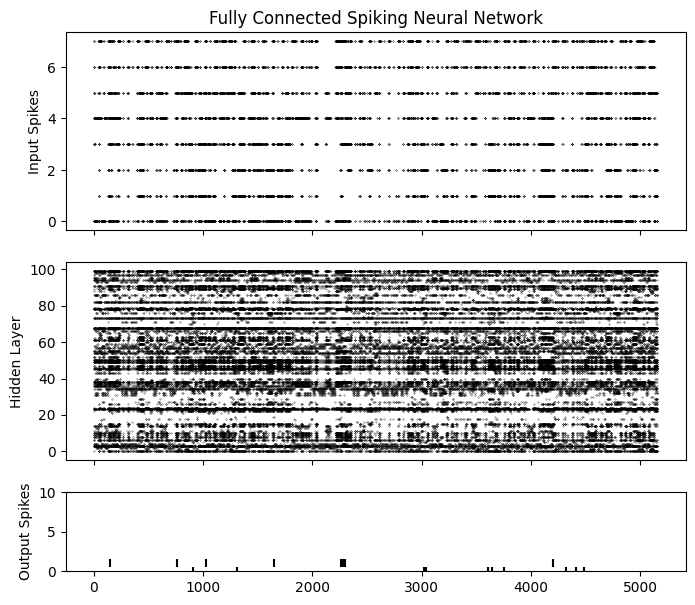

In [42]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# layer parameters
num_inputs = 8
num_hidden = 100
num_outputs = 2
beta = 0.9

num_steps = 5157

# initialize layers
fc1 = nn.Linear(num_inputs, num_hidden)
lif1 = snn.Leaky(beta=beta)
fc2 = nn.Linear(num_hidden, num_outputs)
lif2 = snn.Leaky(beta=beta)


# Initialize hidden states
mem1 = lif1.init_leaky()
mem2 = lif2.init_leaky()

# record outputs
mem2_rec = []
spk1_rec = []
spk2_rec = []

spk_in = sliced_tensor

print(f"Dimensions of spk_in: {spk_in.size()}")


# network simulation
for step in range(num_steps):
    cur1 = fc1(spk_in[step]) # post-synaptic current <-- spk_in x weight
    spk1, mem1 = lif1(cur1, mem1) # mem[t+1] <--post-syn current + decayed membrane
    cur2 = fc2(spk1)
    spk2, mem2 = lif2(cur2, mem2)

    mem2_rec.append(mem2)
    spk1_rec.append(spk1)
    spk2_rec.append(spk2)

# convert lists to tensors
mem2_rec = torch.stack(mem2_rec)
spk1_rec = torch.stack(spk1_rec)
spk2_rec = torch.stack(spk2_rec)


def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, 10])

  plt.show()
plot_snn_spikes(spk_in, spk1_rec, spk2_rec, "Fully Connected Spiking Neural Network")

In [117]:
# Network Architecture
num_inputs = 8
num_hidden = 100
num_outputs = 2

# Temporal Dynamics
num_steps = 200
beta = 0.95

#dataloader arguments
batch_size = 1

dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


In [118]:
# Define Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        
        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        for step in range(num_steps):
            cur1 = self.fc1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)
        
# Load the network onto CUDA if available
net = Net().to(device)

In [119]:
# pass data into the network, sum the spikes over time
# and compare the neuron with the highest number of spikes
# with the target

def print_batch_accuracy(data, targets, train=False):
    output, _ = net(data.view(batch_size, -1))
    _, idx = output.sum(dim=0).max(1)
    acc = np.mean((targets == idx).detach().cpu().numpy())

    if train:
        print(f"Train set accuracy for a single minibatch: {acc*100:.2f}%")
    else:
        print(f"Test set accuracy for a single minibatch: {acc*100:.2f}%")

def train_printer(
    data, targets, epoch,
    counter, iter_counter,
        loss_hist, test_loss_hist, test_data, test_targets):
    print(f"Epoch {epoch}, Iteration {iter_counter}")
    print(f"Train Set Loss: {loss_hist[counter]:.2f}")
    print(f"Test Set Loss: {test_loss_hist[counter]:.2f}")
    print_batch_accuracy(data, targets, train=True)
    print_batch_accuracy(test_data, test_targets, train=False)
    print("\n")